In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Concept-and-Technology-of-AI-/assignment 1 data csv.csv")
print(data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset.

In [ ]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [ ]:
print(data.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
# To calculate mean, median, and standard deviation
mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_dev_score}")

Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
# For highest
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']

# For lowest
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
# Check for missing values and display the total count for each column
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
# Filter countries with a score greater than 7.5
filtered_data = data[data['score'] > 7.5]

print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

# Top 10 rows of the sorted dataset
top_10 = sorted_data.head(10)
print("Top 10 countries sorted by GDP per Capita (filtered by score > 7.5):")
print(top_10)

Top 10 countries sorted by GDP per Capita (filtered by score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
# Adding new column
data['Happiness Category'] = np.where(
    data['score'] >= 7.5, 'High',
    np.where(data['score'] >= 5, 'Moderate', 'Low')
)

# Verify the updated dataset with the new column
print("\nDataset with the new 'Happiness Category' column:")
print(data.head())


Dataset with the new 'Happiness Category' column:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1      

2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

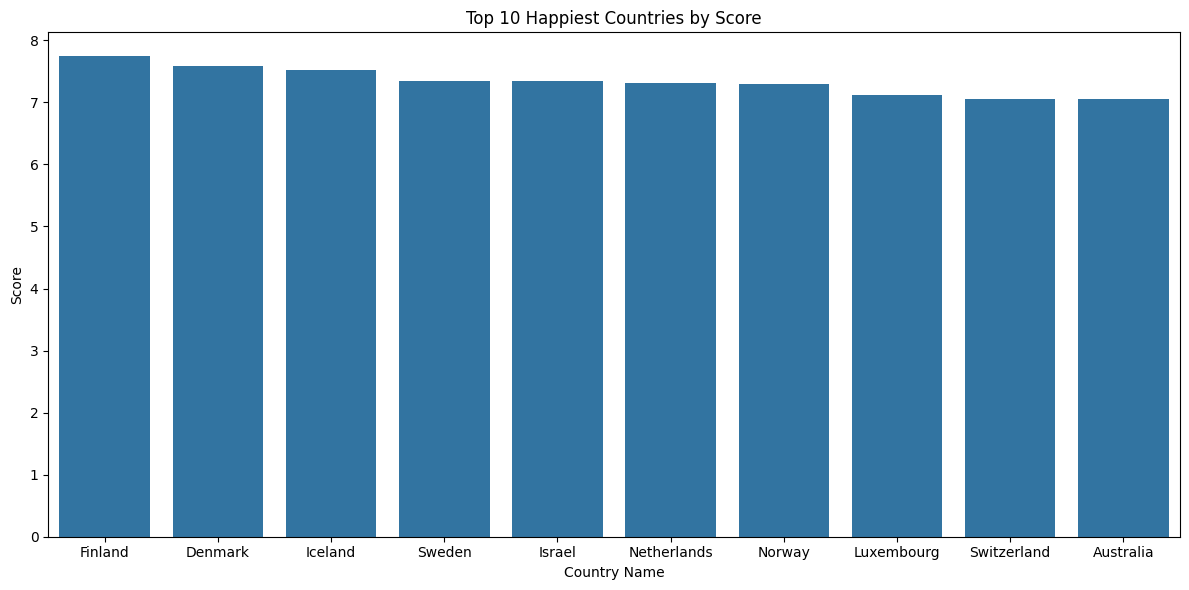

In [ ]:
# Sort the dataset by 'score' in descending order and get the top 10
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest)
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

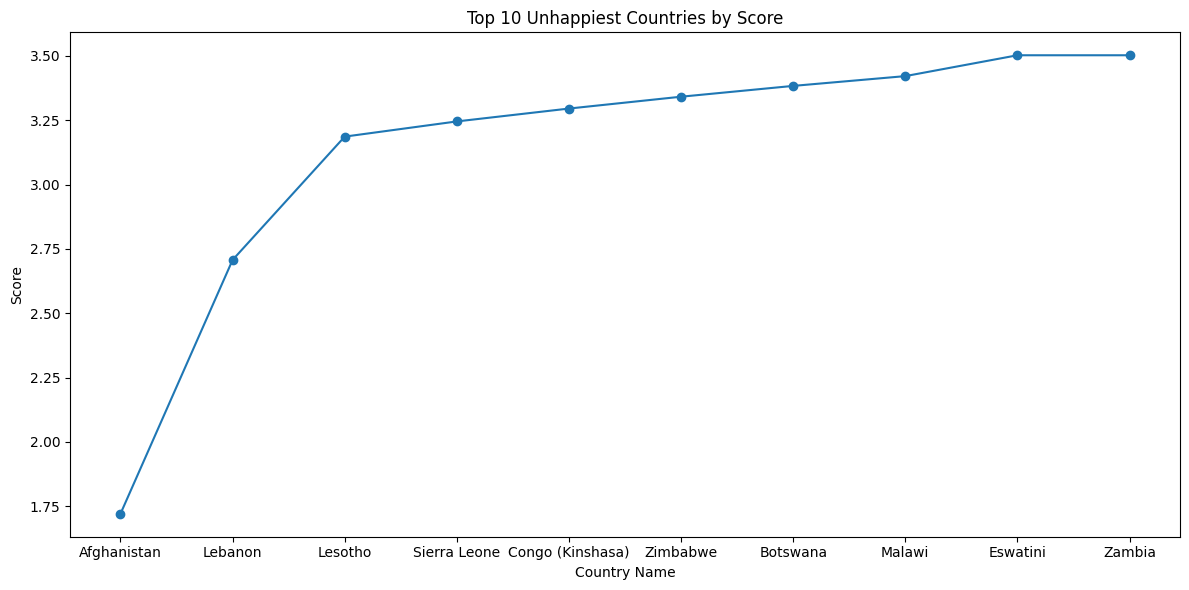

In [ ]:
# Sort the dataset by 'score' in ascending order and get the top 10
top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

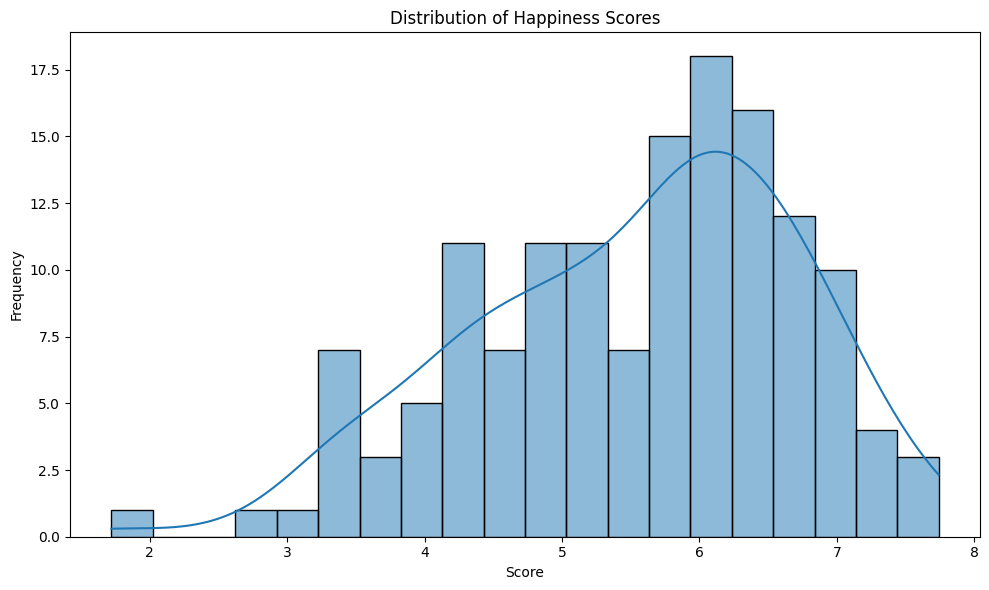

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This histogram shows the happiness scores of diffrent countries
The histogram is left skewed with scores having higher values. The average scores is around 5 to 8 showing that most of countries have high happiness scores.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

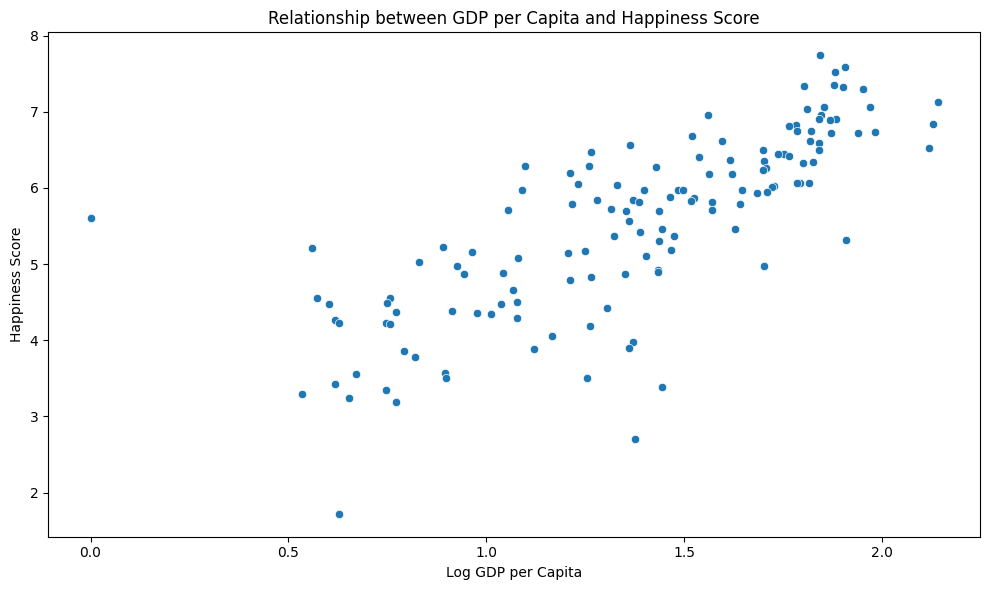

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Filtered dataset
filtered_south_asia_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
# Saving filtered dataset in seperate CSV files
for country in south_asian_countries:
  country_data = filtered_south_asia_data[filtered_south_asia_data['Country name'] == country]
  file_name = f"{country.replace(' ', '_')}_data.csv"
  country_data.to_csv(f"/content/drive/MyDrive/{file_name}", index=False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [ ]:

# Filter data for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)].copy()

# Calculate the Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# Display the updated DataFrame
print(south_asia_data[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Composite Score']].head())

    Country name  Log GDP per capita  Social support  Healthy life expectancy  \
92         Nepal               0.965           0.990                    0.443   
107     Pakistan               1.069           0.600                    0.321   
125        India               1.166           0.653                    0.417   
127    Sri Lanka               1.361           1.179                    0.586   
128   Bangladesh               1.122           0.249                    0.513   

     Composite Score  
92            0.8159  
107           0.7039  
125           0.7874  
127           1.0739  
128           0.6774  


2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
# For countries in descending order
south_asia_data['Rank'] = south_asia_data['Composite Score'].rank(ascending=False)

print(south_asia_data[['Country name', 'Composite Score', 'Rank']])

    Country name  Composite Score  Rank
92         Nepal           0.8159   2.0
107     Pakistan           0.7039   4.0
125        India           0.7874   3.0
127    Sri Lanka           1.0739   1.0
128   Bangladesh           0.6774   5.0
142  Afghanistan           0.3238   6.0


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

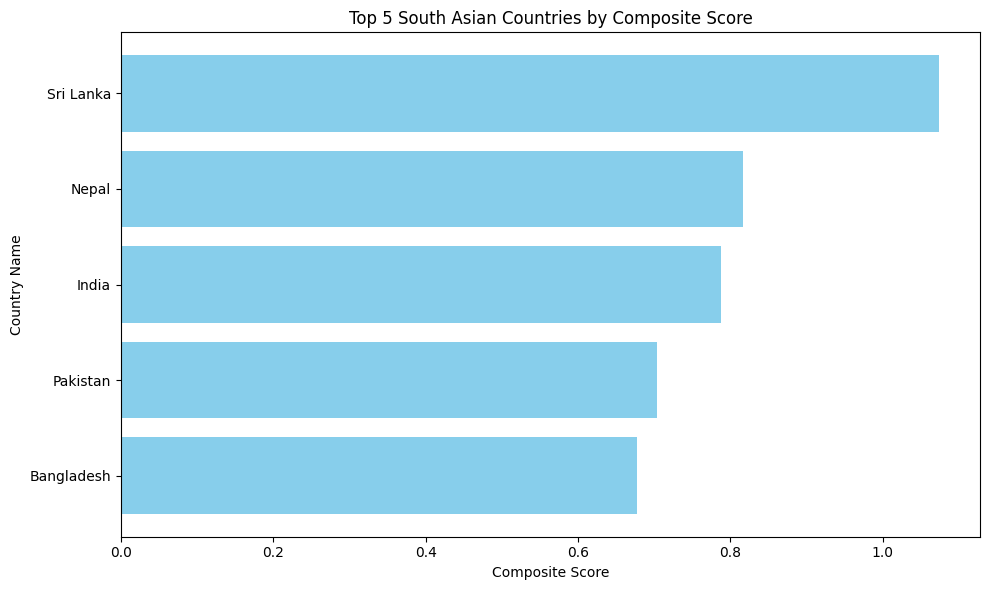

In [ ]:
top_5_countries = south_asia_data.sort_values(by='Composite Score', ascending=False).head(5)

# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # It rotates the fig to opposite bottom to top to show highest score on top
plt.tight_layout()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

    Country name  Composite Score Rank  Original Score Rank  Composite Score  \
92         Nepal                   2.0                  1.0           0.8159   
107     Pakistan                   4.0                  2.0           0.7039   
125        India                   3.0                  3.0           0.7874   
127    Sri Lanka                   1.0                  4.0           1.0739   
128   Bangladesh                   5.0                  5.0           0.6774   
142  Afghanistan                   6.0                  6.0           0.3238   

     score  
92   5.158  
107  4.657  
125  4.054  
127  3.898  
128  3.886  
142  1.721  


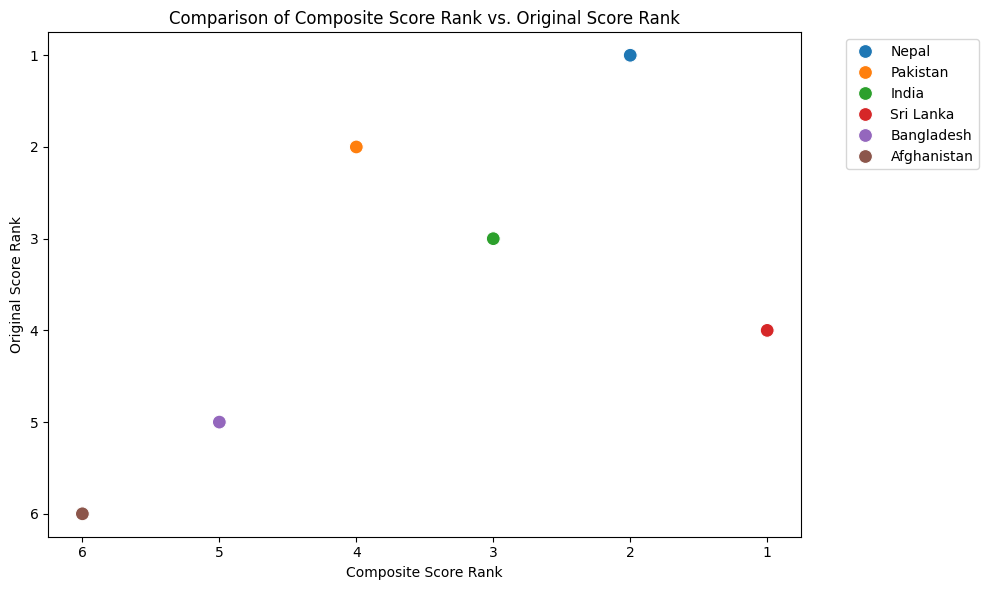

In [ ]:

# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter data for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)].copy()

# Calculate the Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# Rank the South Asian countries based on the Composite Score
south_asia_data['Composite Score Rank'] = south_asia_data['Composite Score'].rank(ascending=False)

# Rank the South Asian countries based on the original Score
south_asia_data['Original Score Rank'] = south_asia_data['score'].rank(ascending=False)

# Merge the data to compare
merged_data = south_asia_data[['Country name', 'Composite Score Rank', 'Original Score Rank','Composite Score', 'score']]

# Display the merged data
print(merged_data)

# Visualization: Scatter plot of Composite Score Rank vs. Original Score Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score Rank', y='Original Score Rank', data=merged_data, hue='Country name', s=100)
plt.title('Comparison of Composite Score Rank vs. Original Score Rank')
plt.xlabel('Composite Score Rank')
plt.ylabel('Original Score Rank')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.
= The outliers and their potential impact on regional averages is high outliers may inflate regional averages and low outliers might drag averages down.

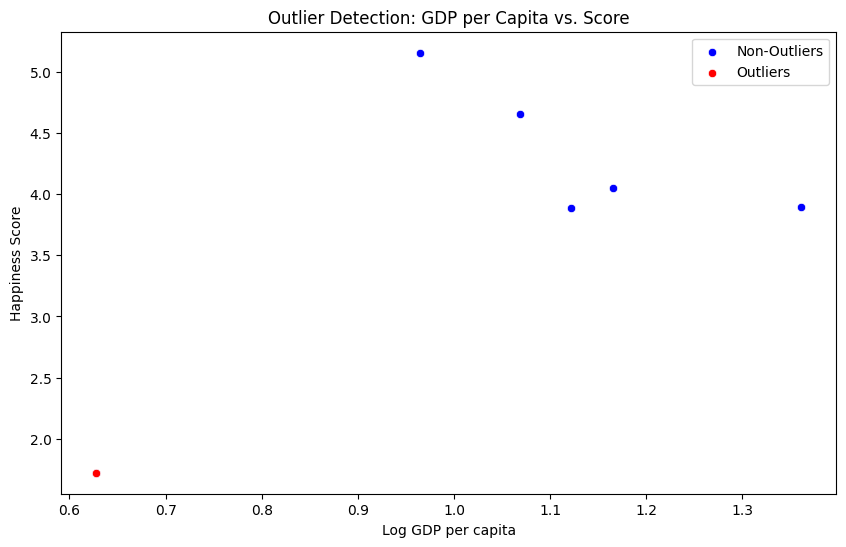

In [ ]:
# Define outliers using the 1.5 × IQR rule
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

outliers = south_asia_data[
    (south_asia_data['score'] < Q1_score - 1.5 * IQR_score) | (south_asia_data['score'] > Q3_score + 1.5 * IQR_score) |
    (south_asia_data['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) | (south_asia_data['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)
]

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outlier Detection: GDP per Capita vs. Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()



Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.


Correlations with Happiness Score:
{'Freedom to make life choices': 0.8005185224163315, 'Generosity': 0.874512371253192}


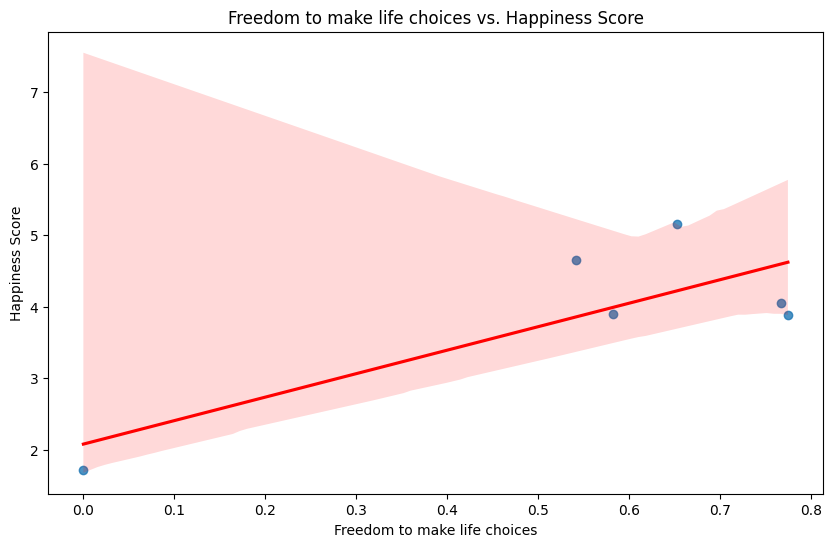

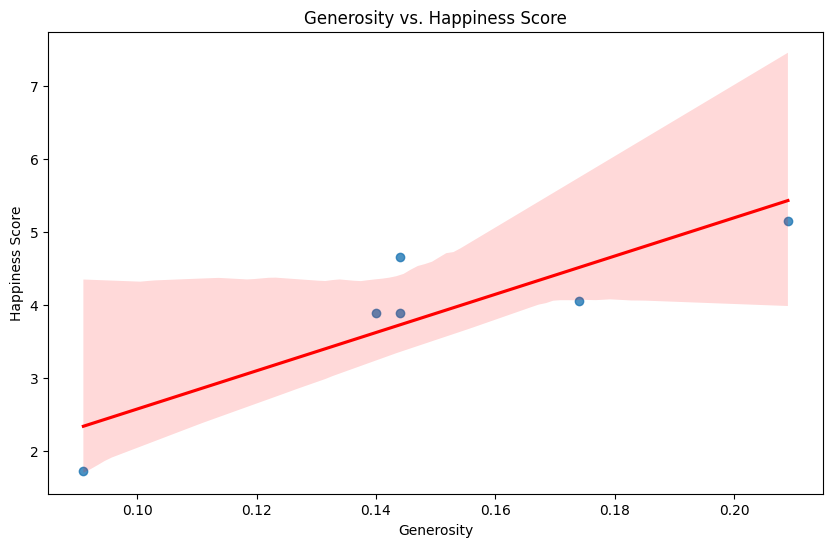

In [ ]:
# Calculate correlations
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in metrics}
print("\nCorrelations with Happiness Score:")
print(correlations)

# Scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, line_kws={"color": "red"})
    plt.title(f'{metric} vs. Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.
= A large gap shows that a country has high GDP per capita but lower performance on social metrices and large negative gap means country have lower GDP per capita but higher performance in social metrices

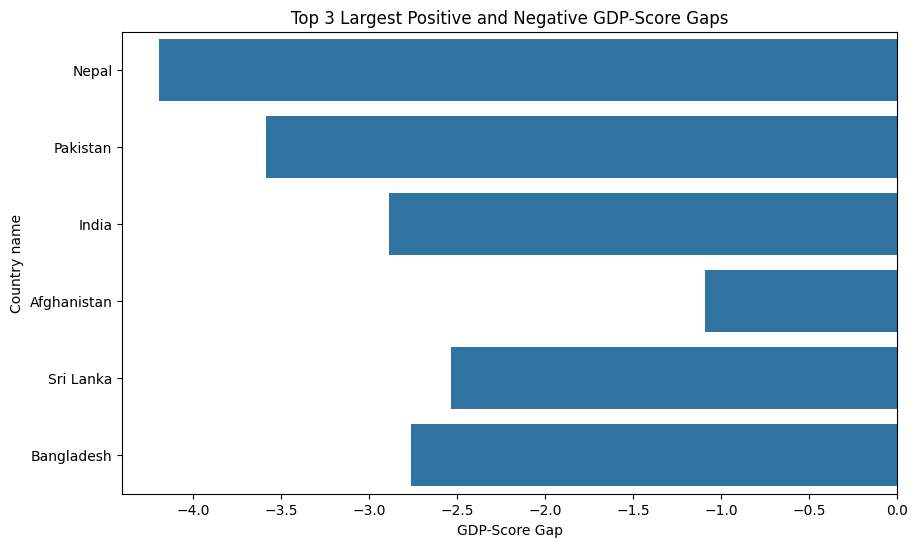

In [ ]:
# Create a new column for GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Rank countries by GDP-Score Gap
ascending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True).head(3)
descending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False).head(3)

# Bar chart for GDP-Score Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([ascending_gap, descending_gap]))
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]


In [ ]:
# Middle Eastern countries list
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
print("Filtered Middle East Dataset:")
print(middle_east_data)



Filtered Middle East Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661 


Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [ ]:
# Calculate mean and standard deviation for South Asia and Middle East
mean_south_asia = south_asia_data['score'].mean()
std_south_asia = south_asia_data['score'].std()

mean_middle_east = middle_east_data['score'].mean()
std_middle_east = middle_east_data['score'].std()

print("\nDescriptive Statistics:")
print(f"South Asia - Mean: {mean_south_asia}, Std Dev: {std_south_asia}")
print(f"Middle East - Mean: {mean_middle_east}, Std Dev: {std_middle_east}")

# Determine which region has higher average happiness
higher_avg_region = "South Asia" if mean_south_asia > mean_middle_east else "Middle East"
print(f"\n The region with higher average happiness score is: {higher_avg_region}")


Descriptive Statistics:
South Asia - Mean: 3.895666666666667, Std Dev: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Std Dev: 1.5662011684327144

 The region with higher average happiness score is: Middle East


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

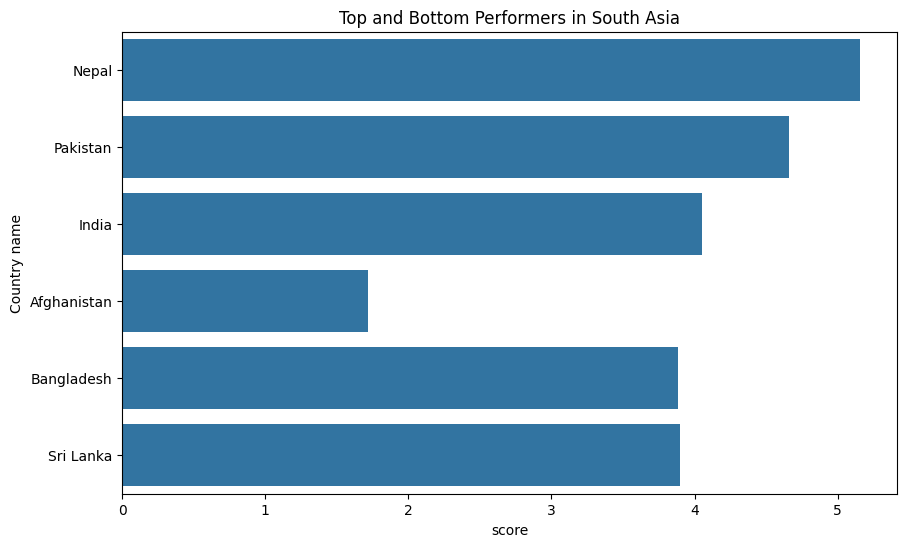

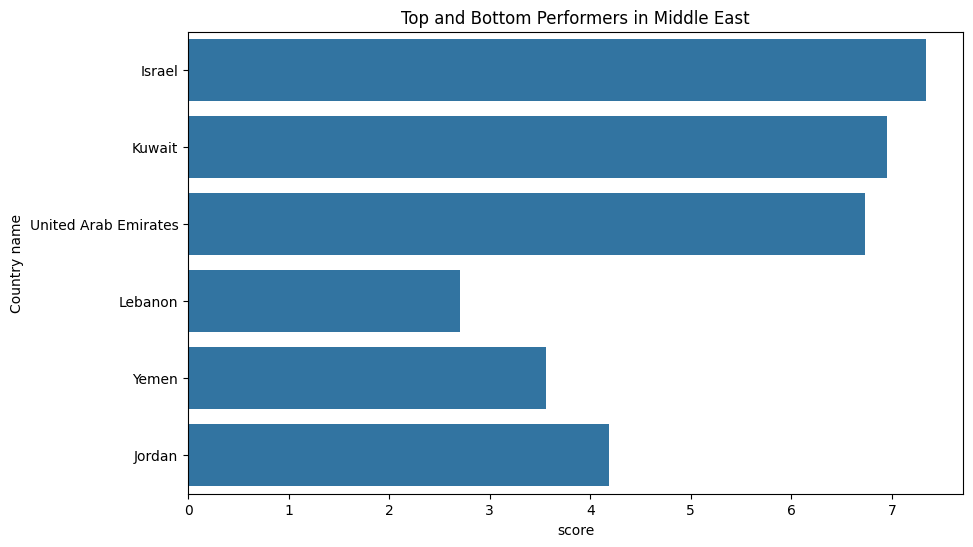

In [ ]:
# Identify top 3 and bottom 3 countries in each region
top_3_sa = south_asia_data.nlargest(3, 'score')
bottom_3_sa = south_asia_data.nsmallest(3, 'score')

top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')

# Plot bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]))
plt.title('Top and Bottom Performers in South Asia')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]))
plt.title('Top and Bottom Performers in Middle East')
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

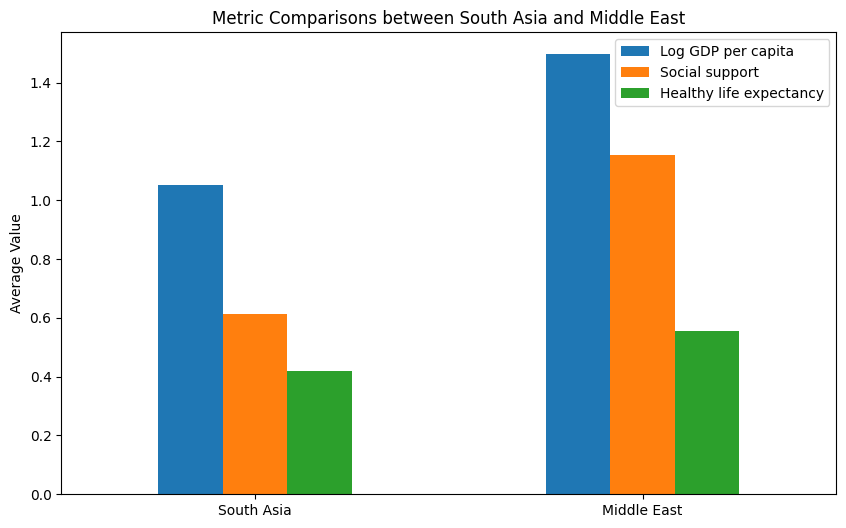

The metric which has the largest disparity is: Social support


In [ ]:
# Compare key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
means_sa = south_asia_data[metrics].mean()
means_me = middle_east_data[metrics].mean()

# Grouped bar chart
comparison_df = pd.DataFrame({'South Asia': means_sa, 'Middle East': means_me}).T
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Metric Comparisons between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

# Find metric with largest disparity
largest_disparity = (means_sa - means_me).abs().idxmax()
print(f"The metric which has the largest disparity is: {largest_disparity}")

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
# Compute range and coefficient of variation (CV)
def compute_disparity(data):
    range_ = data['score'].max() - data['score'].min()
    cv = data['score'].std() / data['score'].mean()
    return range_, cv

range_sa, cv_sa = compute_disparity(south_asia_data)
range_me, cv_me = compute_disparity(middle_east_data)

print(f"\nSouth Asia - Range: {range_sa}, CV: {cv_sa}")
print(f"Middle East - Range: {range_me}, CV: {cv_me}")

# Determine which region has greater variability
greater_variability = "South Asia" if cv_sa > cv_me else "Middle East"
print(f"Region with greater variability in happiness is: {greater_variability}")


South Asia - Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Range: 4.634, CV: 0.28938880812119405
Region with greater variability in happiness is: South Asia


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.


Correlation Analysis:
South Asia: {'Log GDP per capita': 0.583969319428558, 'Social support': 0.6974343971971296, 'Healthy life expectancy': 0.4615442007568599}
Middle East: {'Log GDP per capita': 0.8026378194626558, 'Social support': 0.778130249459693, 'Healthy life expectancy': 0.5660943514747497}


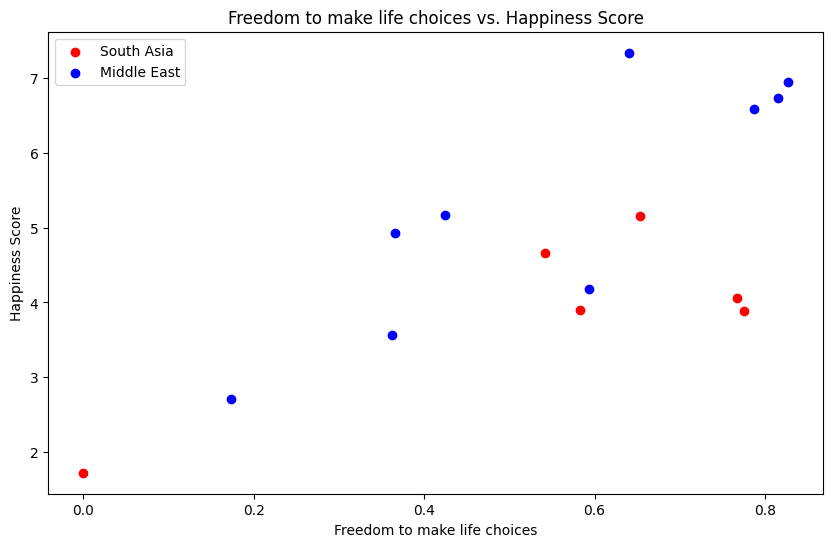

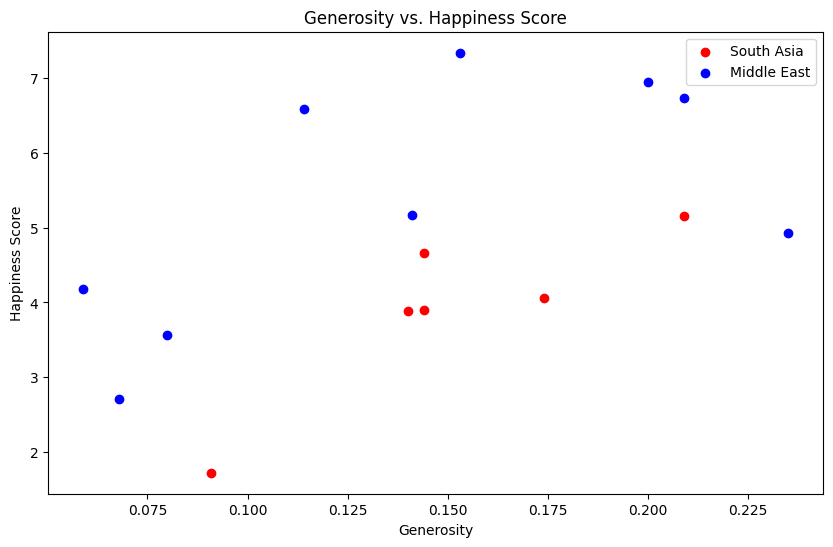

In [ ]:
# Correlation of Score with 'Freedom to Make Life Choices' and 'Generosity' within each region
correlations_sa = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in metrics}
correlations_me = {metric: middle_east_data[metric].corr(middle_east_data['score']) for metric in metrics}

print("\nCorrelation Analysis:")
print(f"South Asia: {correlations_sa}")
print(f"Middle East: {correlations_me}")

# Scatter plots with trendlines
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    plt.scatter(south_asia_data[metric], south_asia_data['score'], color='red', label='South Asia')
    plt.scatter(middle_east_data[metric], middle_east_data['score'], color='blue', label='Middle East')
    plt.title(f'{metric} vs. Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

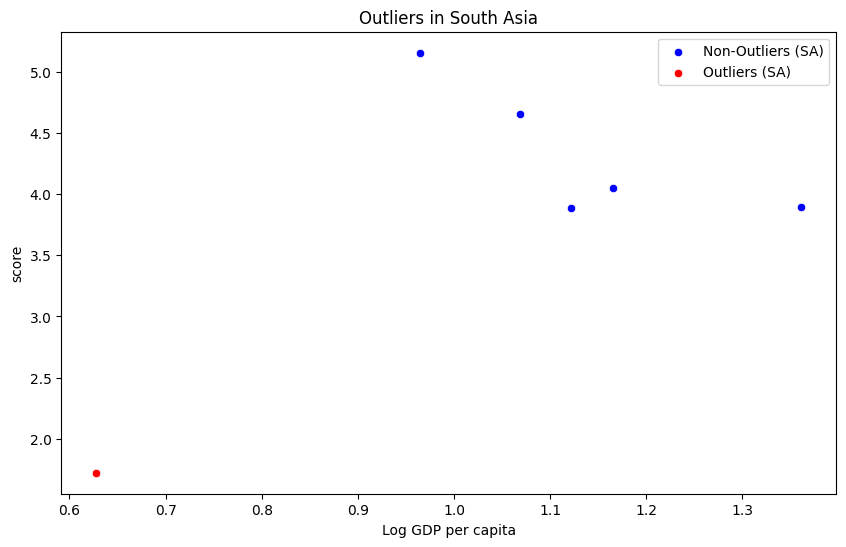

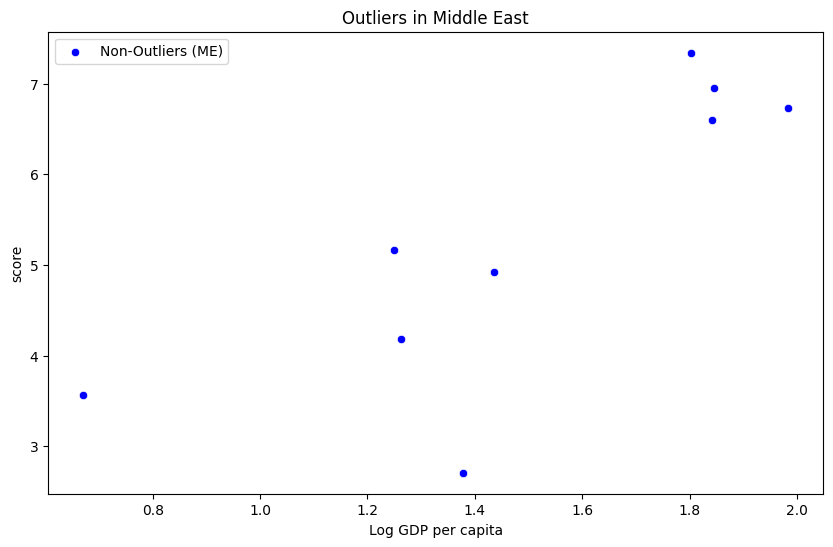

In [ ]:
# Detect outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_sa = detect_outliers(south_asia_data, 'score')
outliers_me = detect_outliers(middle_east_data, 'score')

# Plot outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Non-Outliers (SA)', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa, label='Outliers (SA)', color='red')
plt.title('Outliers in South Asia')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Non-Outliers (ME)', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me, label='Outliers (ME)', color='red')
plt.title('Outliers in Middle East')
plt.show()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

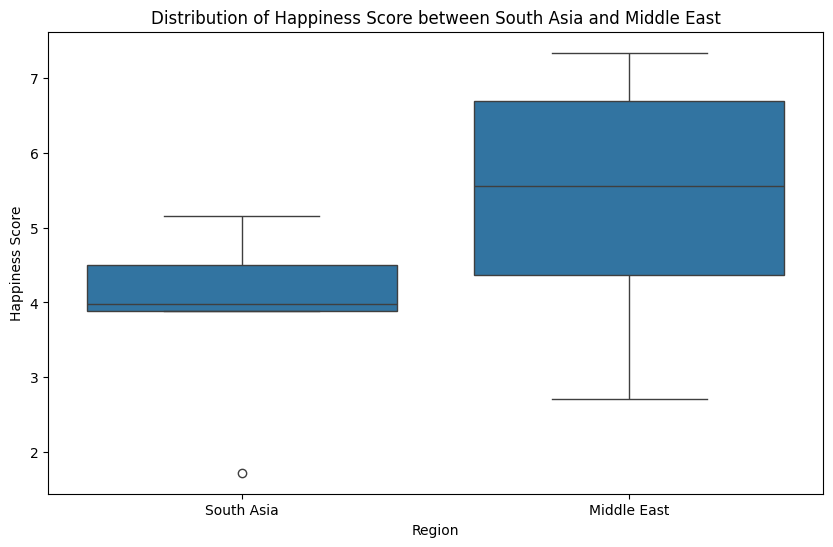

In [ ]:
south_asia_data = data[data['Country name'].isin(south_asian_countries)].copy()

middle_east_data = data[data['Country name'].isin(middle_east_countries)].copy()

# Create a combined DataFrame for boxplot
south_asia_data['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'
combined_data = pd.concat([south_asia_data, middle_east_data])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data)
plt.title('Distribution of Happiness Score between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()


• Interpreting the key differences in distribution shapes, medians, and outliers.

= Distribution shape
In south Asia it shows narrow box indicating low level happiness while in middle east it has wider box showing high level of happiness

Medians
The median between 4 to 5 range shows average happiness while in middle east median closer to 6 to 7 shows higher happiness

Outliers
The narrow range in South Asia may have fewer outliers indicating most of countries have same happiness scores while middle east may have outlier on both high and low ends showing some countries may have higher ad lower happiness scores than others.